# Segmentação de Clientes

A **Clusterização** é o agrupamento de dados ou itens com base em suas semelhanças compartilhadas, que normalmente são quantificadas usando medidas de distância que calculam a extensão da separação entre dois pontos de dados. Duas medidas de distância comumente usadas são as distâncias **Euclidiana** e de **Manhattan**.

Pertence ao grupo de Aprendizado Não Supervisionado por que não há um label que classifica o ponto.

Os tipos mais comuns de algoritmos de cluster são:
- **Clustering K-Means:** Esta é uma técnica exclusiva de clustering, onde cada ponto pertence a apenas um cluster. Com K-Means, os dados são agrupados em um número predeterminado, K, de clusters.
- **Clustering Hierárquico:** Este método organiza os dados ou itens em grupos de forma hierárquica, criando uma estrutura de clusters semelhante a uma árvore. Ao contrário do K-Means, o clustering hierárquico não requer a especificação antecipada do número de clusters, oferecendo mais flexibilidade na análise de cluster.

Nesta análise, usaremos clustering KMean e Hierárquico para:
1. Segregar os clientes em clusters/grupos
2. Fornecer recomendações a um gerente de varejo com base nos segmentos de clientes identificados.

### Escopo da Análise

A análise se concentrará em um espaço 2D para CustomerID (eixo X) e 'Spending Score' (pontuação de gastos) (eixo Y). Esta é uma ilustração e esta abordagem podem ser aplicadas a diferentes features (parâmetros).

A análise de diferentes features segue a mesma abordagem, no entanto, para features categóricas, precisamos converter para valores numéricos antes de usar o algoritmo de aprendizado de máquina.

### Conjunto de dados

O conjunto de dados do cliente é um conjunto de dados de aprendizagem do Kaggle. É composto por cinco features (CustomerID, Gênero, Idade, Renda Anual e Pontuação de Gastos) com 200 linhas. A Pontuação de Gastos varia de 0 a 100 e é atribuída a um cliente com base em critérios como quantidade e valor de uma compra.

Fonte: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

***
## Agrupamento KMEAN

Passo a passo para realizar um Clustering KMean usando Python:
1. Executar o pré-processamento de dados no conjunto de dados
2. Extrair as features necessárias para a análise
3. Selecionar o número de centróides usando o Método Elbow
4. Construir o modelo usando o algoritmo KMeans
5. Visualizar seu resultado dos clusters

In [41]:
# Importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14,6)

In [42]:
# Carrega dados
customer_data = pd.read_csv("Mall_Customers.csv")

customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [43]:
customer_data.shape

(200, 5)

In [44]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## Análise Exploratória dos Dados

In [45]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [46]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [47]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

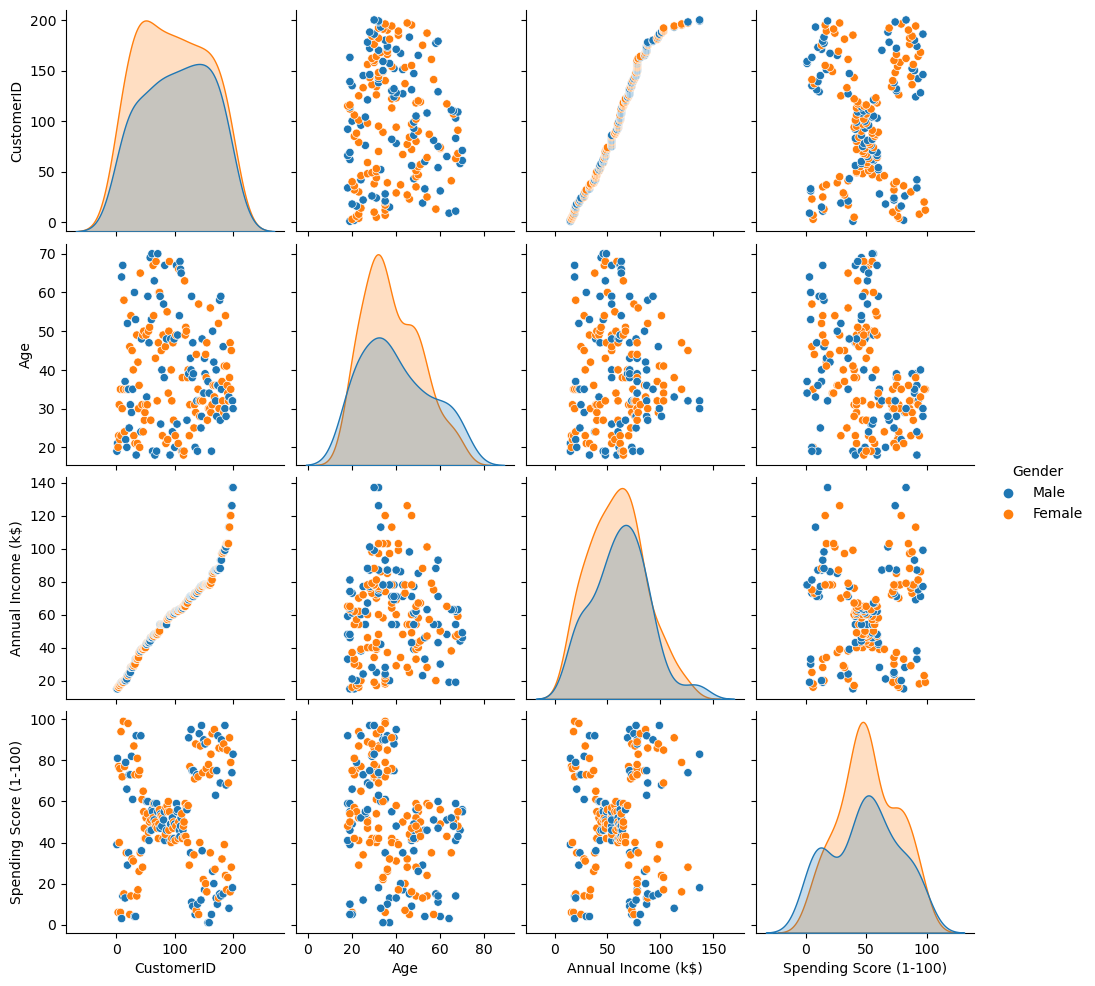

In [48]:
sns.pairplot(customer_data,hue="Gender");

## Extraindo as features necessárias para a análise

Segregando os clientes em clusters com base em CustomerIDs e 'Spending score'.

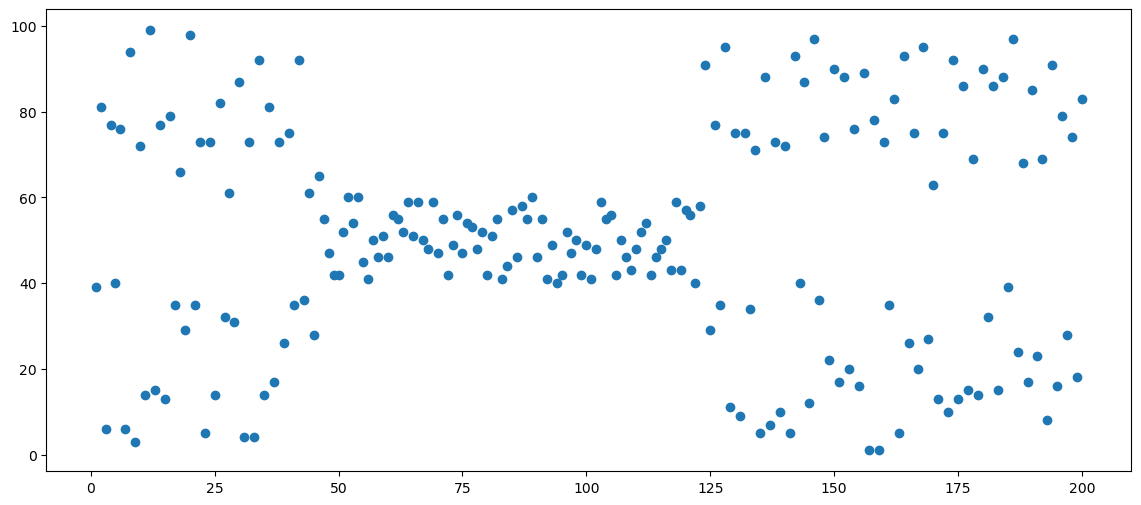

In [49]:
plt.scatter(customer_data['CustomerID'], customer_data['Spending Score (1-100)']);

In [50]:
# Isolando CustomerID e Spending Score em nova variável
new_customer_data = customer_data.iloc[:, [0, 4]]

new_customer_data

,CustomerID,Spending Score (1-100)
0,1,39
1,2,81
2,3,6
3,4,77
4,5,40
...,...,...
195,196,79
196,197,28
197,198,74
198,199,18


### Calculando o número de centróides

#### Análise do cotovelo
Usando a análise do cotovelo, pode-se encontrar a quantidade k de centróides no agrupamento kmean.

In [51]:
wcss = []

for n in range(1, 10):
    Km = KMeans(n_clusters=n, random_state=2)
    Km.fit(new_customer_data)
    wcss.append(Km.inertia_)

wcss

[799354.0,
 299339.42000000004,
 206835.45909367187,
 131468.5276891567,
 97691.1454257004,
 69928.75707430863,
 55367.96360112755,
 43451.75809948859,
 37245.44106231539]

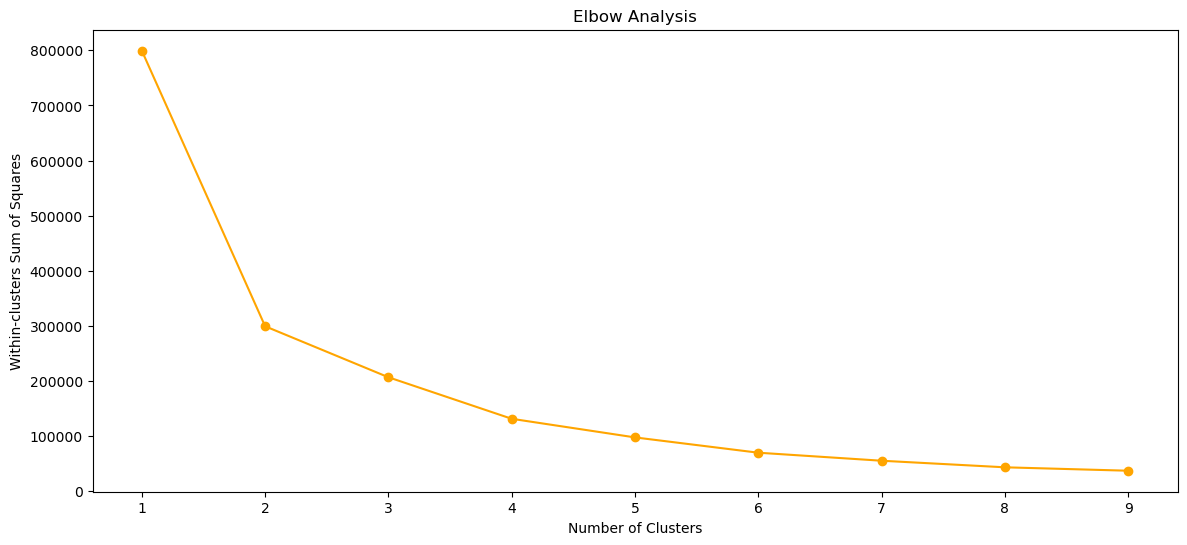

In [52]:
# Plotando o gráfico do 'cotovelo'

plt.plot(np.arange(1, 10), wcss, marker='o', color='orange')
plt.title('Elbow Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-clusters Sum of Squares');

### Construindo o modelo K Mean

A partir da análise do cotovelo, o número de clusters a serem usados para o cluster KMean é 4.

In [53]:
# Fitting Kmean
Kmeans = KMeans(n_clusters=4 ,random_state=2)
Kmeans.fit(new_customer_data)

KMeans(n_clusters=4, random_state=2)

### Computando os centróides

In [54]:
centroids = Kmeans.cluster_centers_
labels = Kmeans.labels_

In [55]:
# Predizendo o grupo de clientes que o novo cliente pertence
pred = Kmeans.fit_predict(new_customer_data)

pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### Visualizando os clusters

In [56]:
# convertendo o dataset para numpy array
data_array = np.array(new_customer_data)
h = 0.02
x_min, x_max = data_array[:, 0].min()- 1, data_array[:, 0].max() + 1
y_min, y_max = data_array[:, 1].min() - 1, data_array[:, 1].max() + 1
x, y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = Kmeans.predict(np.c_[x.ravel(), y.ravel()])

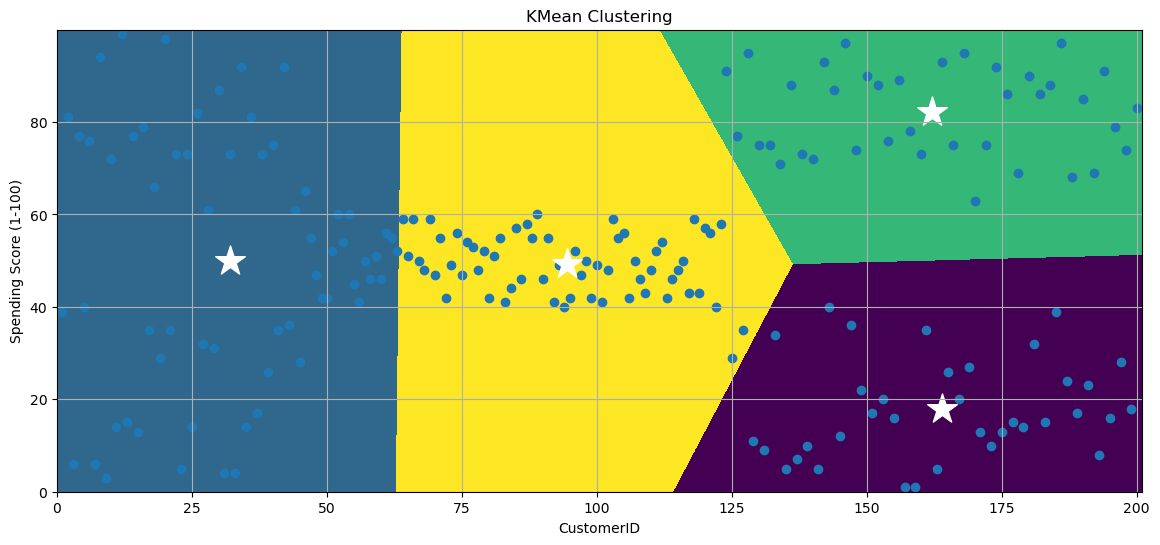

In [68]:
# Plotando os clusters
Z = Z.reshape(x.shape)

plt.imshow(Z, interpolation='nearest', extent = (x.min(), x.max(), y.min(), y.max()), aspect='auto', origin='lower')
plt.scatter(new_customer_data['CustomerID'], new_customer_data['Spending Score (1-100)'])
plt.scatter(centroids[:,0], centroids[:,1], s=500, marker='*', color='white');
plt.grid()
plt.title('KMean Clustering')
plt.xlabel('CustomerID')
plt.ylabel('Spending Score (1-100)');

## AGRUPAMENTO HIERÁRQUICO

Esta abordagem de agrupamento visa organizar os dados ou itens em uma estrutura hierárquica. Existem dois métodos primários de agrupamento hierárquico: **Aglomerativo** e **Divisivo**. Os pontos de dados dentro dos mesmos clusters são considerados semelhantes com base em uma medida de distância, e os clusters são mesclados usando um método de ligação. Os métodos de ligação comuns incluem o método de ligação simples, o método de ligação completo, o método de Ward, entre outros.

Nesta análise, utilizamos a **medida de distância euclidiana** e escolhemos especificamente o **método de Ward**. A justificativa por trás da seleção do método de Ward é minimizar a variação dentro dos clusters e alcançar um tamanho de cluster equilibrado. Este método ajuda a garantir que os clusters resultantes sejam homogêneos e tenham tamanhos relativamente iguais.

### CLUSTERING AGLOMERATIVO

No clustering hierárquico aglomerativo, o algoritmo começa com uma abordagem bottom-up, tratando cada ponto de dados como um cluster separado e, em seguida, mescla sucessivamente os clusters usando um método de ligação até que um único cluster contendo todos os pontos de dados seja formado.

Passo a passo:
1. Pré-processar o conjunto de dados
2. Selecionar os recursos necessários para a análise.
3. Construir um dendograma para auxiliar na seleção do número de clusters
4. Construir o modelo.
5. Visualizar os clusters

In [58]:
new_customer_data_hier = new_customer_data

new_customer_data_hier

,CustomerID,Spending Score (1-100)
0,1,39
1,2,81
2,3,6
3,4,77
4,5,40
...,...,...
195,196,79
196,197,28
197,198,74
198,199,18


### Construindo o dendograma

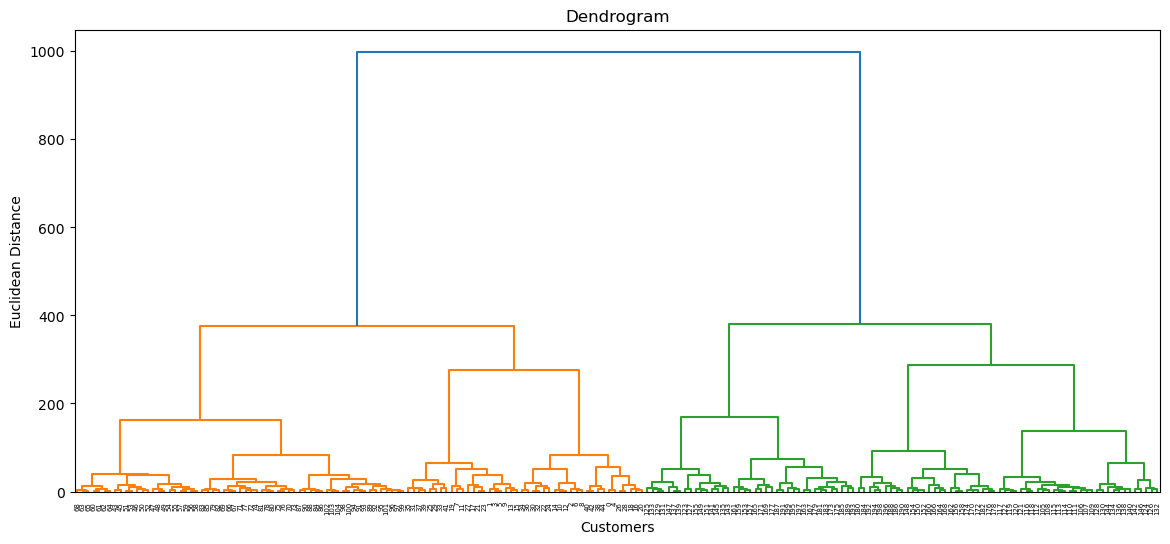

In [59]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

dendro = dendrogram(linkage(new_customer_data_hier, method='ward'))

plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram')
plt.show();

### Construindo o modelo aglomerativo

Com base no dendograma pode-se considerar 4 clusters para construir o modelo.

In [60]:
Agglom = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
Agglom.fit(new_customer_data_hier)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [61]:
y_pred = Agglom.fit_predict(new_customer_data_hier)

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

### Visualização os clusters

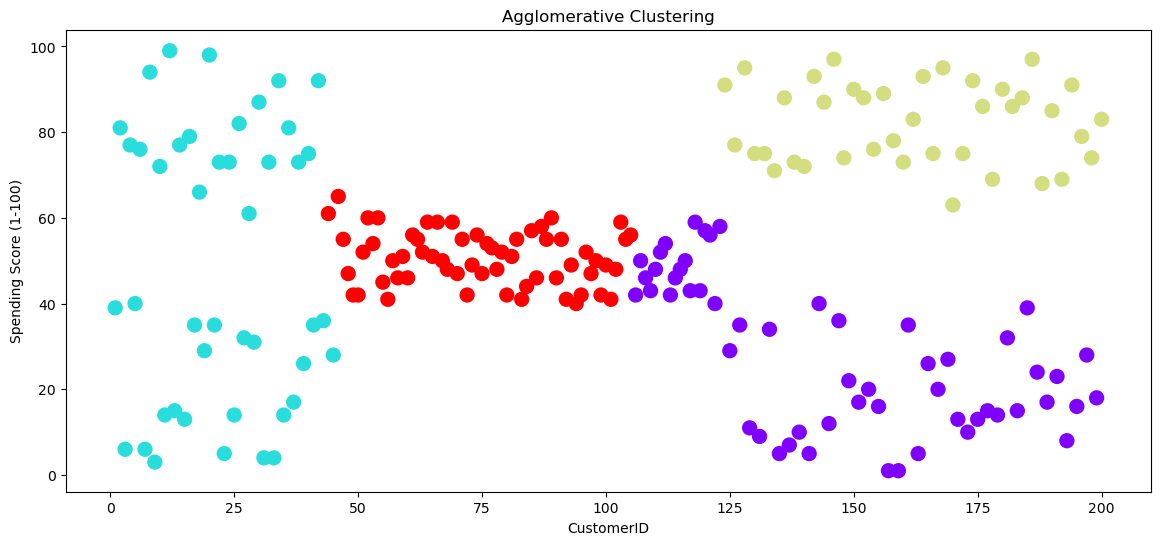

In [62]:
cluster_labels = Agglom.labels_

plt.scatter(new_customer_data_hier['CustomerID'], new_customer_data_hier['Spending Score (1-100)'], c=cluster_labels, cmap='rainbow', s=100)
plt.title('Agglomerative Clustering')
plt.xlabel('CustomerID')
plt.ylabel('Spending Score (1-100)');

In [63]:
new_customer_data_hier

,CustomerID,Spending Score (1-100)
0,1,39
1,2,81
2,3,6
3,4,77
4,5,40
...,...,...
195,196,79
196,197,28
197,198,74
198,199,18


### Extraindo a segmentação dos clientes

In [64]:
new_customer_data_hier['y_pred'] = y_pred

segment_1 = new_customer_data_hier[new_customer_data_hier['y_pred'] == 0]

segment_1.head()

,CustomerID,Spending Score (1-100),y_pred
105,106,42,0
106,107,50,0
107,108,46,0
108,109,43,0
109,110,48,0


In [65]:
segment_2 = new_customer_data_hier[new_customer_data_hier['y_pred'] == 1]

segment_2.head()

,CustomerID,Spending Score (1-100),y_pred
0,1,39,1
1,2,81,1
2,3,6,1
3,4,77,1
4,5,40,1


In [66]:
segment_3 = new_customer_data_hier[new_customer_data_hier['y_pred'] == 2]

segment_3.head()

,CustomerID,Spending Score (1-100),y_pred
123,124,91,2
125,126,77,2
127,128,95,2
129,130,75,2
131,132,75,2


In [67]:
segment_4 = new_customer_data_hier[new_customer_data_hier['y_pred'] == 3]

segment_4.head()

,CustomerID,Spending Score (1-100),y_pred
43,44,61,3
45,46,65,3
46,47,55,3
47,48,47,3
48,49,42,3


## Resultados

A partir da análise, é evidente que tanto o agrupamento K-Means quanto o agrupamento hierárquico produzem resultados semelhantes em termos de segregação do conjunto de dados. O conjunto de dados do cliente foi efetivamente dividido em quatro clusters com base nos atributos de CustomerID e 'Spending Score'.

Recomenda-se que sejam implementadas estratégias adaptadas a cada segmento de clientes através de:
1. **Recomendação de produto personalizada:** Envie e-mails personalizados com recomendações de produtos com base nas necessidades de segmentos específicos. Isso garante que os clientes recebam ofertas e produtos relevantes aos seus interesses.
2. **Campanhas de marketing personalizadas:** Personalize mensagens publicitárias para que correspondam aos valores e interesses de segmentos específicos de clientes. Essa abordagem melhora o envolvimento e aumenta a probabilidade de conversões.

## Conclusão

O objetivo desse trabalho foi apresentar de forma simples e didática uma forma de resolver a **Clusterização de Clientes**.

Para isso, foram apresentadas dois métodos de clusterização: por K-Means e Hierárquico Aglomerativo. Em ambos os casos, a medida de distância entre os pontos foi calculada usando a distância Euclidiana, o que levou a uma semelhança dos resultados entre os métodos de clusterização.

Para que o resultado seja realmente aplicado em produção e utilizado na tomada de decisão, é necessário aplicar outros critérios na clusterização e métricas de avaliação.